In [175]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [176]:
#load test and train datas
train =pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [177]:
train_original =train.copy()
test_original=test.copy()

In [178]:
test.columns, test.columns

(Index(['ID', 'Datetime'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [179]:
train.dtypes ,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [180]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [181]:
#feature Extraction
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M',errors='coerce') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M',errors='coerce') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M',errors='coerce')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M',errors='coerce')

In [182]:
for i in (train,test,test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [183]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [184]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

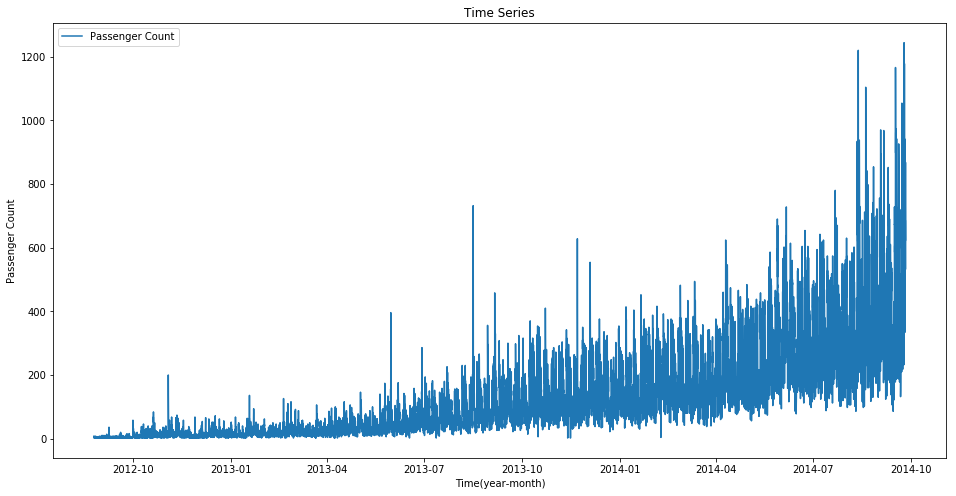

In [185]:
#lets visualize time-Series
train.index =train['Datetime']
df=train.drop('ID',1)
ts =df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label ='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

In [186]:
#inference: series has a inceasing trend , which means that number of passenger count is increasing with respect to time.The sudden raising spikes in between may be some abstract reasons due to which the traffic was high. 
#Our Hypothesis: 1) Traffic will increase as the years pass by.
#                2) Traffic will be high from May to October
#                3) Traffic on weekdays will be more
#                4) Traffic during the peak hours will be high

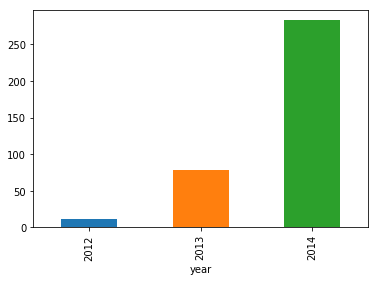

In [187]:
#EXPLORATORY ANALYSIS
#For First Hypothesis: Traffic will increase as the years pass by.

train.groupby('year')['Count'].mean().plot.bar()

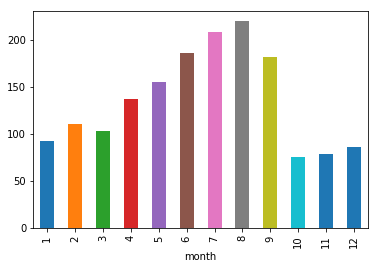

In [188]:
#Second Hypothesis: Traffic will be high from May to October

train.groupby('month')['Count'].mean().plot.bar()

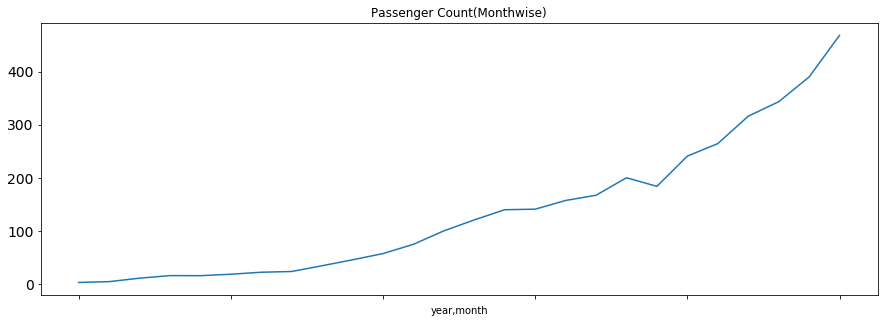

In [189]:
#last three months have seen tremendous downfall,lets analyze them individually,by looking at the monthly mean.

train.groupby(['year', 'month'])['Count'].mean().plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

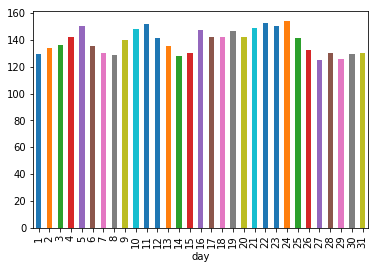

In [190]:
#daily mean of passenger count
train.groupby('day')['Count'].mean().plot.bar()

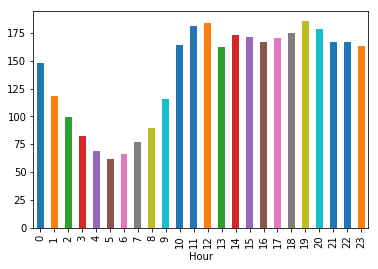

In [191]:
#3rd Hypothesis: Traffic during the peak hours will be high
train.groupby('Hour')['Count'].mean().plot.bar()

In [192]:
#from above, it can be inferred that peak traffic is at 7pm and least at 5 am.


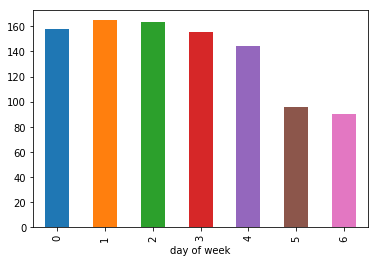

In [193]:
#4th Hypothesis: Traffic on weekdays will be more
#   0 is monday(starting day) and 6 is the sunday

train.groupby('day of week')['Count'].mean().plot.bar()


In [194]:
#Here we can infer that traffic is least on Saturday and Sunday.

In [195]:
#now we will drop the ID variable, as it has nothing to do woth the passenger count.
train= train.drop('ID',1)

In [196]:
#hourly time series has a lot of noise, we will aggegrate the hourly time series to daily,weekly,and monthly time series to make it stable and convienent for a model to learn.
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

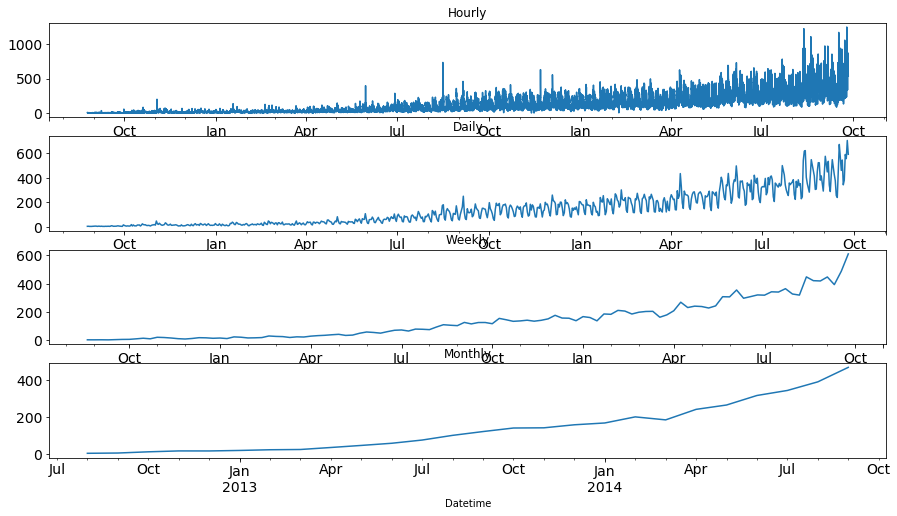

In [197]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [198]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [201]:
#Splitting the data in training and validation
Train =train.ix['2012-08-25':'2014-06-24']
valid =train.ix['2014-06-25':'2014-09-25']

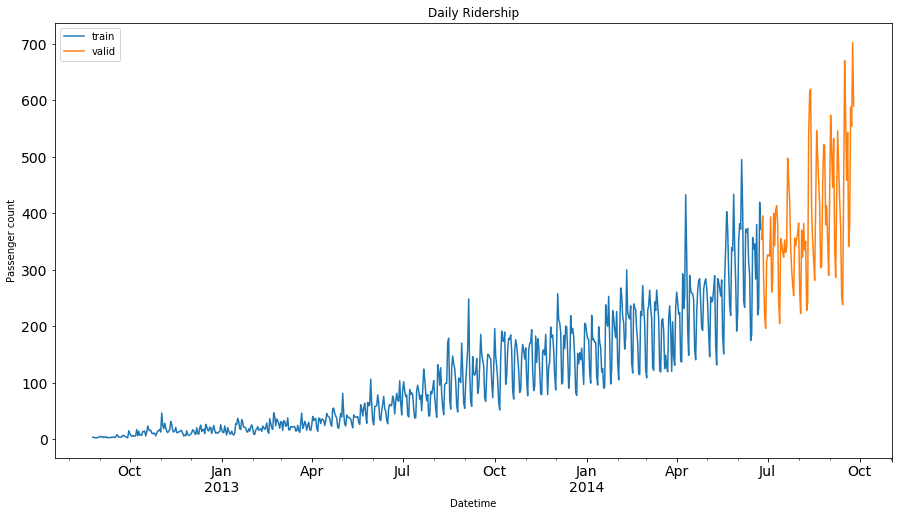

In [202]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

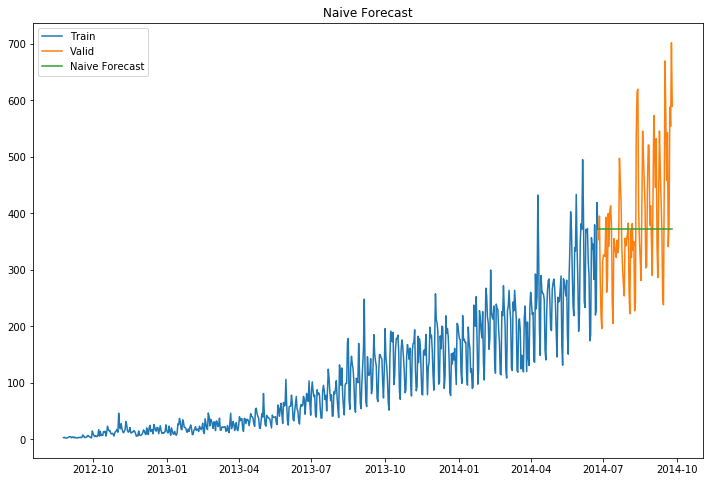

In [203]:
#Naive approach to model
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()